## Titanic - Dataset & Analysis

By: Renaud Justin Beaupre

The data file for this dataset can be downloaded from the Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. Similarly, the definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.** 
* What categories of passengers were most likely to survive the Titanic disaster? 

**Question 2.**  
* What other attributes did you use for the analysis?

**Question 3.** 
* Did you engineer any attributes (create new attributes)?
* Did you exclude any attributes from the analysis?

**Question 4.** 
* How did you treat missing values for those attributes that you included in the analysis?

,Survived,Pclass,Sex,Age,Sib/Sp,Par/Ch,Fare,Cabin,Embarked,Title
0,0,3,0,22,1,0,7,8,0,0
1,1,1,1,38,1,0,71,2,1,0
2,1,3,1,26,0,0,7,8,0,0
3,1,1,1,35,1,0,53,2,0,0
4,0,3,0,35,0,0,8,8,0,0
5,0,3,0,29,0,0,8,8,2,0
6,0,1,0,54,0,0,51,4,0,0
7,0,3,0,2,3,1,21,8,0,0
8,1,3,1,27,0,2,11,8,0,0
9,1,2,1,14,1,0,30,8,1,0


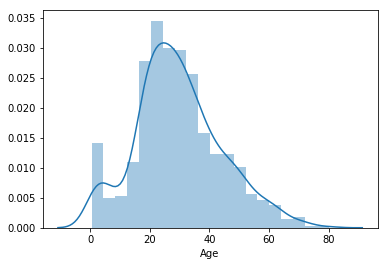

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

titanic = pd.read_csv('train.csv', sep=',', header=0, names=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Sib/Sp', 'Par/Ch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])
titanic.head(20)
#titanic.info()
titanic.describe()
titanic.isna().sum() #Age, Cabin, and Embarked all have NaNs

titanic_age_explore = titanic.dropna(subset=['Age'])
titanic_age_explore
sns.distplot(titanic_age_explore['Age']) #Age appears to decently well-distributed except for a slight right-skew so I'm just going to fill the missing values with the mean

titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic.isna().sum() #Age now has '0'

titanic['Cabin'].unique() #The values in 'Cabin' seem to follow the pattern 'deck-xxx' so I'm going to remap them based on proximity (1-8) to the boat deck indicated here: https://www.dummies.com/education/history/titanic-facts-the-layout-of-the-ship/

classes = {
    "A": 0,
    "B": 1,
    "C": 2,
    "D": 3,
    "E": 4,
    "F": 5,
    "G": 6,
    "T": 7,
}

def cabin_to_proximity(cabin_str):
    if isinstance(cabin_str, str):
        class_letter = cabin_str[0]
        return classes[class_letter]

    return 8

titanic.loc[:, 'Cabin'] = titanic["Cabin"].apply(cabin_to_proximity)
titanic.head()
titanic.isna().sum() #Eyyyy

titanic['Embarked'].describe() #I'm going to replace the NaNs in 'Embarked' with the top value 'S'
titanic['Embarked'].fillna('S', inplace=True)
titanic.isna().sum() #Looks good

titanic.columns #I feel like we can drop 'PassengerId' cause it doesn't play a role in survival. Also, 'Name' and 'Ticket' might be too unique to be useful but I'm going to check quickly anyway
titanic['Name'].nunique() #Some of the names have interesting titles or honorifics (i.e. 'Master' for PassengerId=8) so I'm gonna extract them...

titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic.head(20) #Doooope

titanic['Ticket'].nunique() #Some of the tickets seem like they COULD be something because there's letters mixed with numbers but I wasn't able to find any results on Google to confirm that hypothesis

titanic_cleaned =  titanic.drop(columns=['PassengerId', 'Name', 'Ticket'])
titanic_cleaned['Sex'].replace('male', 0, inplace=True) #turn this puppy into a numerical category
titanic_cleaned['Sex'].replace('female', 1, inplace=True)
titanic_cleaned['Embarked'].replace('S', 0, inplace=True) #this one too
titanic_cleaned['Embarked'].replace('C', 1, inplace=True)
titanic_cleaned['Embarked'].replace('Q', 2, inplace=True)

titanic_cleaned['Title'].unique()
titanic_cleaned['Title'].value_counts() #I'm going to use common=0 and special=1, with 'special' being all the values below Master
titanic_cleaned['Title'].replace(['Mr','Miss','Mrs','Master'], 0, inplace=True)
titanic_cleaned['Title'].replace(['Dr','Rev','Major','Mlle','Col','Sir','Jonkheer','Ms','Don','Mme','Lady','Capt','Countess'], 1, inplace=True)
titanic_cleaned['Title'].unique()
titanic_cleaned['Title'].value_counts()

titanic_cleaned['Age'] = titanic_cleaned['Age'].astype('int64')
titanic_cleaned['Fare'] = titanic_cleaned['Fare'].astype('int64')

titanic_cleaned.head(20)

In [3]:
titanic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
Sib/Sp      891 non-null int64
Par/Ch      891 non-null int64
Fare        891 non-null int64
Cabin       891 non-null int64
Embarked    891 non-null int64
Title       891 non-null int64
dtypes: int64(10)
memory usage: 69.7 KB


In [47]:
titanic_grouped = titanic_cleaned.groupby('Survived')

In [48]:
titanic_grouped.mean()

,Pclass,Sex,Age,Sib/Sp,Par/Ch,Fare,Cabin,Embarked,Title
Survived,,,,,,,,,
0,2.531876,0.147541,30.240437,0.553734,0.329690,21.690346,7.300546,0.307832,0.027322
1,1.950292,0.681287,28.426901,0.473684,0.464912,47.991228,5.777778,0.447368,0.035088


In [49]:
titanic_grouped.median()

,Pclass,Sex,Age,Sib/Sp,Par/Ch,Fare,Cabin,Embarked,Title
Survived,,,,,,,,,
0,3,0,29,0,0,10,8,0,0
1,2,1,29,0,0,26,8,0,0


In [50]:
titanic_grouped.var()

,Pclass,Sex,Age,Sib/Sp,Par/Ch,Fare,Cabin,Embarked,Title
Survived,,,,,,,,,
0,0.541409,0.126002,155.347194,1.659972,0.677602,985.469633,3.790894,0.384993,0.026624
1,0.745322,0.217772,190.339216,0.502238,0.595539,4436.671477,8.278918,0.423908,0.033956


In [51]:
titanic_grouped.std() #Quick cross-reference between these stat sets seems to indicate that the survivors might be wealthier & more female, we need to confirm the other attributes by looking into them more closely...

,Pclass,Sex,Age,Sib/Sp,Par/Ch,Fare,Cabin,Embarked,Title
Survived,,,,,,,,,
0,0.735805,0.354968,12.463835,1.288399,0.823166,31.392191,1.947022,0.620478,0.163170
1,0.863321,0.466660,13.796348,0.708688,0.771712,66.608344,2.877311,0.651082,0.184271


In [7]:
#titanic_cleaned['Pclass'].hist(by=titanic_cleaned['Survived'], xrot=360, sharex=True, sharey=True)
#titanic_cleaned['Sex'].hist(by=titanic_cleaned['Survived'], xrot=360, sharex=True, sharey=True)
#titanic_cleaned['Age'].hist(by=titanic_cleaned['Survived'], xrot=360, sharex=True, sharey=True)
#titanic_cleaned['Sib/Sp'].hist(by=titanic_cleaned['Survived'], xrot=360, sharex=True, sharey=True)
#titanic_cleaned['Par/Ch'].hist(by=titanic_cleaned['Survived'], xrot=360, sharex=True, sharey=True)
#titanic_cleaned['Fare'].hist(by=titanic_cleaned['Survived'], xrot=360, sharex=True, sharey=True)
#titanic_cleaned['Cabin'].hist(by=titanic_cleaned['Survived'], xrot=360, sharex=True, sharey=True)
#titanic_cleaned['Embarked'].hist(by=titanic_cleaned['Survived'], xrot=360, sharex=True, sharey=True)
#titanic_cleaned['Title'].hist(by=titanic_cleaned['Survived'], xrot=360, sharex=True, sharey=True)

#x = titanic_cleaned['Pclass'].loc[titanic_cleaned['Survived'] == 0]
#y = titanic_cleaned['Pclass'].loc[titanic_cleaned['Survived'] == 1]
#bins = np.linspace(1, 3, 3)
#plt.hist(x, bins, alpha=0.5, color='red', label='Perished')
#plt.hist(y, bins, alpha=0.5, color='blue', label='Survived')
#plt.legend(loc='upper right')
#plt.show()

#x = titanic_cleaned['Pclass'].loc[titanic_cleaned['Survived'] == 0]
#y = titanic_cleaned['Pclass'].loc[titanic_cleaned['Survived'] == 1]
#stats.ttest_ind(x, y, equal_var = False)

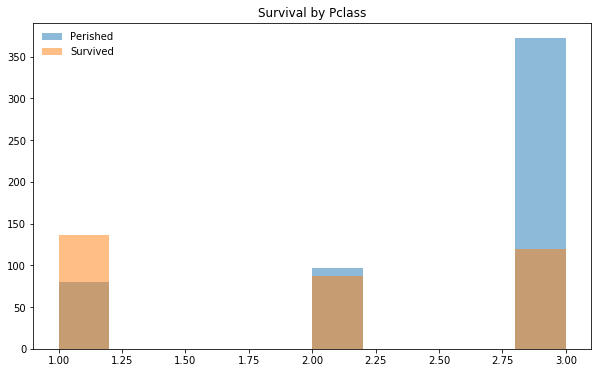

In [52]:
x = titanic_cleaned['Pclass'].loc[titanic_cleaned['Survived'] == 0]
y = titanic_cleaned['Pclass'].loc[titanic_cleaned['Survived'] == 1]

f, ax = plt.subplots(figsize=(10, 6))
ax.hist(x, label = 'Perished', alpha=0.5)
ax.hist(y, label = 'Survived', alpha=0.5)
ax.legend(frameon=False, loc='upper left')
ax.set(title = 'Survival by Pclass'); #looks like the relative probability of survival was higher for wealthier passengers

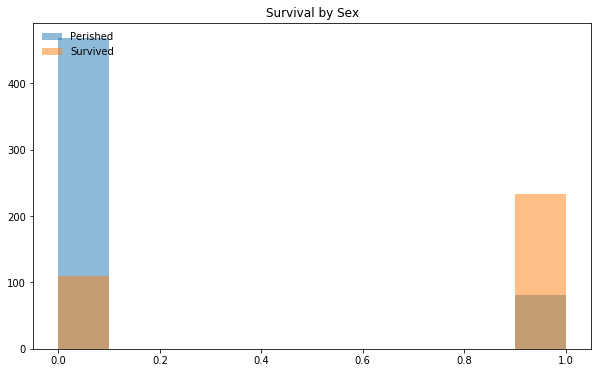

In [53]:
x2 = titanic_cleaned['Sex'].loc[titanic_cleaned['Survived'] == 0]
y2 = titanic_cleaned['Sex'].loc[titanic_cleaned['Survived'] == 1]

f, ax = plt.subplots(figsize=(10, 6))
ax.hist(x2, label = 'Perished', alpha=0.5)
ax.hist(y2, label = 'Survived', alpha=0.5)
ax.legend(frameon=False, loc='upper left')
ax.set(title = 'Survival by Sex'); #looks like the relative probability of survival was higher for women

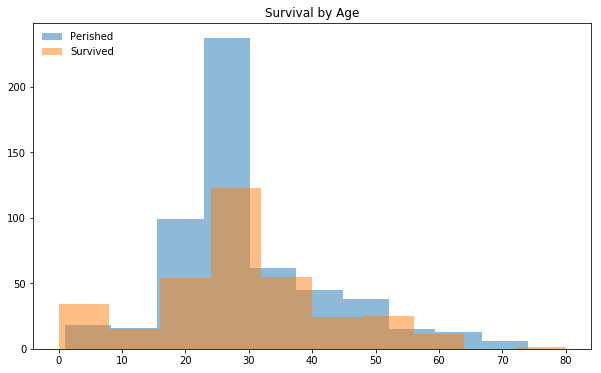

In [54]:
x3 = titanic_cleaned['Age'].loc[titanic_cleaned['Survived'] == 0]
y3 = titanic_cleaned['Age'].loc[titanic_cleaned['Survived'] == 1]

f, ax = plt.subplots(figsize=(10, 6))
ax.hist(x3, label = 'Perished', alpha=0.5)
ax.hist(y3, label = 'Survived', alpha=0.5)
ax.legend(frameon=False, loc='upper left')
ax.set(title = 'Survival by Age'); #About the same roughly but we can see that young children seem to do better

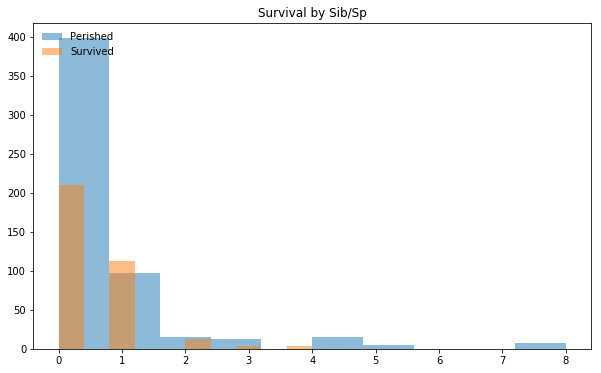

In [55]:
x4 = titanic_cleaned['Sib/Sp'].loc[titanic_cleaned['Survived'] == 0]
y4 = titanic_cleaned['Sib/Sp'].loc[titanic_cleaned['Survived'] == 1]

f, ax = plt.subplots(figsize=(10, 6))
ax.hist(x4, label = 'Perished', alpha=0.5)
ax.hist(y4, label = 'Survived', alpha=0.5)
ax.legend(frameon=False, loc='upper left')
ax.set(title = 'Survival by Sib/Sp'); #Again, about the same but it seems like there's a noticeable limit around Sip/Sp=4 (probably mostly children perishing after Sip/Sp=4) for perfect group size

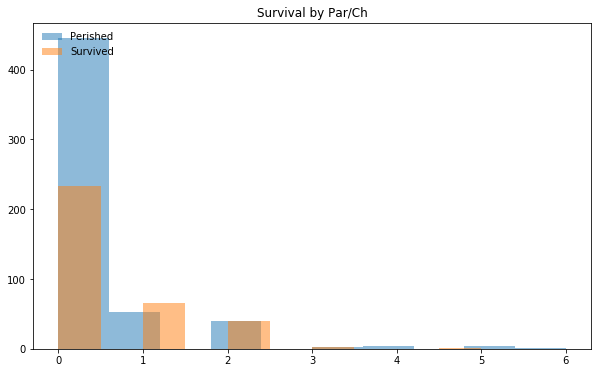

In [56]:
x5 = titanic_cleaned['Par/Ch'].loc[titanic_cleaned['Survived'] == 0]
y5 = titanic_cleaned['Par/Ch'].loc[titanic_cleaned['Survived'] == 1]

f, ax = plt.subplots(figsize=(10, 6))
ax.hist(x5, label = 'Perished', alpha=0.5)
ax.hist(y5, label = 'Survived', alpha=0.5)
ax.legend(frameon=False, loc='upper left')
ax.set(title = 'Survival by Par/Ch'); #Looks like the same trend as above but with Par/Ch

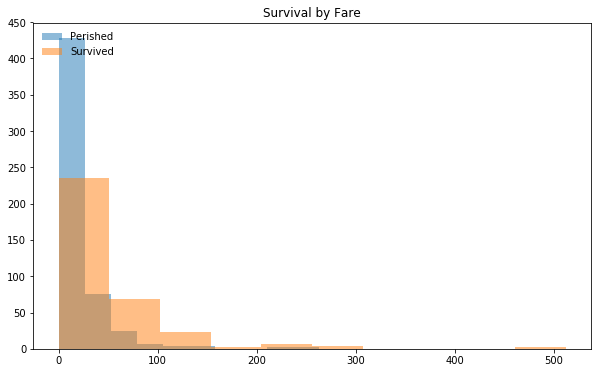

In [62]:
x6 = titanic_cleaned['Fare'].loc[titanic_cleaned['Survived'] == 0]
y6 = titanic_cleaned['Fare'].loc[titanic_cleaned['Survived'] == 1]

f, ax = plt.subplots(figsize=(10, 6))
ax.hist(x6, label = 'Perished', alpha=0.5)
ax.hist(y6, label = 'Survived', alpha=0.5)
ax.legend(frameon=False, loc='upper left')
ax.set(title = 'Survival by Fare'); #huge variance in 'Fare' but it suggests higher fares did better for survival

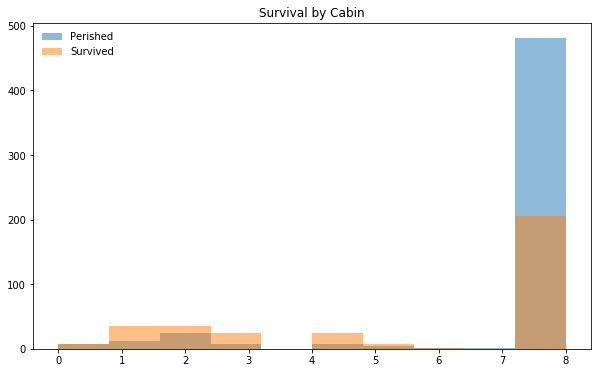

In [63]:
x7 = titanic_cleaned['Cabin'].loc[titanic_cleaned['Survived'] == 0]
y7 = titanic_cleaned['Cabin'].loc[titanic_cleaned['Survived'] == 1]

f, ax = plt.subplots(figsize=(10, 6))
ax.hist(x7, label = 'Perished', alpha=0.5)
ax.hist(y7, label = 'Survived', alpha=0.5)
ax.legend(frameon=False, loc='upper left')
ax.set(title = 'Survival by Cabin'); #Seems like the closer to the upper decks you were the better your chances of survival

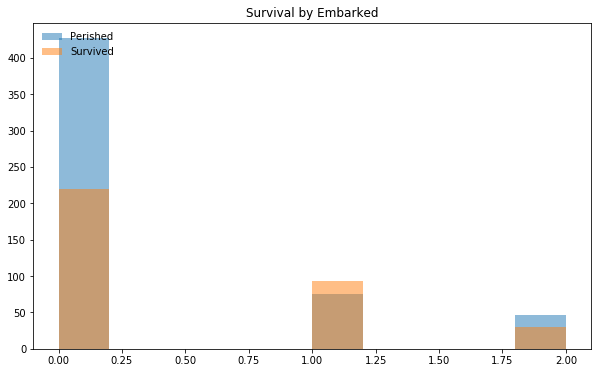

In [6]:
x8 = titanic_cleaned['Embarked'].loc[titanic_cleaned['Survived'] == 0]
y8 = titanic_cleaned['Embarked'].loc[titanic_cleaned['Survived'] == 1]

f, ax = plt.subplots(figsize=(10, 6))
ax.hist(x8, label = 'Perished', alpha=0.5)
ax.hist(y8, label = 'Survived', alpha=0.5)
ax.legend(frameon=False, loc='upper left')
ax.set(title = 'Survival by Embarked'); #Seems like your relative chance for survival was higher if you got on at Cherbourg

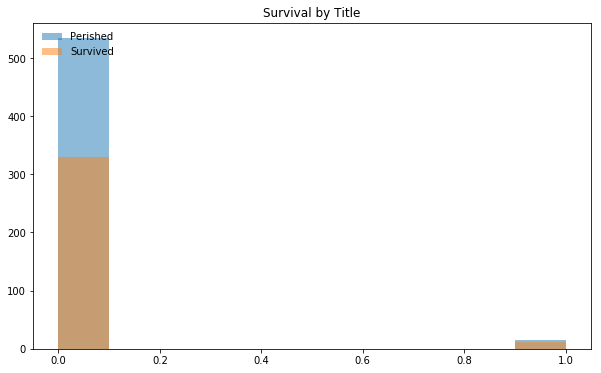

In [3]:
x9 = titanic_cleaned['Title'].loc[titanic_cleaned['Survived'] == 0]
y9 = titanic_cleaned['Title'].loc[titanic_cleaned['Survived'] == 1]

f, ax = plt.subplots(figsize=(10, 6))
ax.hist(x9, label = 'Perished', alpha=0.5)
ax.hist(y9, label = 'Survived', alpha=0.5)
ax.legend(frameon=False, loc='upper left')
ax.set(title = 'Survival by Title'); #Given some of the values for 'Title' (i.e. Rev for Reverend)), it's not surprising that a larger portion of the 'special' population survived

In [5]:
titanic_cleaned_normalized = (titanic_cleaned - titanic_cleaned.mean()) / titanic_cleaned.std()
titanic_cleaned_normalized.head(20)

titanic_cleaned_normalized.corr()

,Survived,Pclass,Sex,Age,Sib/Sp,Par/Ch,Fare,Cabin,Embarked,Title
Survived,1.000000,-0.338481,0.543351,-0.067809,-0.035322,0.081629,0.257482,-0.301116,0.106811,0.022030
Pclass,-0.338481,1.000000,-0.131900,-0.335071,0.083081,0.018443,-0.550553,0.746616,0.045702,-0.206333
Sex,0.543351,-0.131900,1.000000,-0.082533,0.114631,0.245489,0.182331,-0.123076,0.116569,-0.034471
Age,-0.067809,-0.335071,-0.082533,1.000000,-0.232743,-0.176744,0.094069,-0.252002,0.000234,0.167780
Sib/Sp,-0.035322,0.083081,0.114631,-0.232743,1.000000,0.414838,0.159506,0.041540,-0.059961,-0.036364
Par/Ch,0.081629,0.018443,0.245489,-0.176744,0.414838,1.000000,0.216252,-0.032548,-0.078665,-0.067480
Fare,0.257482,-0.550553,0.182331,0.094069,0.159506,0.216252,1.000000,-0.523226,0.061061,0.024750
Cabin,-0.301116,0.746616,-0.123076,-0.252002,0.041540,-0.032548,-0.523226,1.000000,-0.034887,-0.144646
Embarked,0.106811,0.045702,0.116569,0.000234,-0.059961,-0.078665,0.061061,-0.034887,1.000000,0.033415
Title,0.022030,-0.206333,-0.034471,0.167780,-0.036364,-0.067480,0.024750,-0.144646,0.033415,1.000000


In [6]:
titanic_cleaned.corr() #Not sure if the different scale for 'Fare' and 'Age' would work so I tried normalizing it. Turns out there's no difference.

,Survived,Pclass,Sex,Age,Sib/Sp,Par/Ch,Fare,Cabin,Embarked,Title
Survived,1.000000,-0.338481,0.543351,-0.067809,-0.035322,0.081629,0.257482,-0.301116,0.106811,0.022030
Pclass,-0.338481,1.000000,-0.131900,-0.335071,0.083081,0.018443,-0.550553,0.746616,0.045702,-0.206333
Sex,0.543351,-0.131900,1.000000,-0.082533,0.114631,0.245489,0.182331,-0.123076,0.116569,-0.034471
Age,-0.067809,-0.335071,-0.082533,1.000000,-0.232743,-0.176744,0.094069,-0.252002,0.000234,0.167780
Sib/Sp,-0.035322,0.083081,0.114631,-0.232743,1.000000,0.414838,0.159506,0.041540,-0.059961,-0.036364
Par/Ch,0.081629,0.018443,0.245489,-0.176744,0.414838,1.000000,0.216252,-0.032548,-0.078665,-0.067480
Fare,0.257482,-0.550553,0.182331,0.094069,0.159506,0.216252,1.000000,-0.523226,0.061061,0.024750
Cabin,-0.301116,0.746616,-0.123076,-0.252002,0.041540,-0.032548,-0.523226,1.000000,-0.034887,-0.144646
Embarked,0.106811,0.045702,0.116569,0.000234,-0.059961,-0.078665,0.061061,-0.034887,1.000000,0.033415
Title,0.022030,-0.206333,-0.034471,0.167780,-0.036364,-0.067480,0.024750,-0.144646,0.033415,1.000000


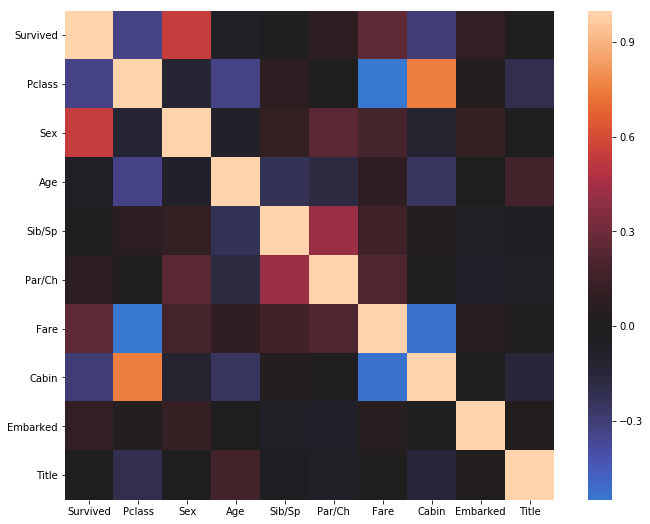

In [3]:
corrmat = titanic_cleaned.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, center=0, square=True); #Pclass, Sex, Fare and Cabin seem to all influence survival with Sex being the most signficant

#corrmat = titanic_cleaned_normalized.corr()
#f, ax = plt.subplots(figsize=(12, 9))
#sns.heatmap(corrmat, center=0, square=True);

#### Question 1 - Answer:

The categories that saw increased survival rates include: wealthier passengers (esp. for Pclass=1, but the relative probability of survival was also higher for Pclass=2 if you adjust the variable for its population size), female passengers (‘Sex’ saw the highest correlation with ‘Survived’), passengers who paid higher fares (this was highly correlated with ‘Pclass’), passengers who had cabins located more closely to the lifeboat deck (again, this was highly correlated with ‘Pclass’ too), and passengers who had special titles/honorifics in their name (i.e. ‘Rev’ for Reverend).

‘Age’ did not seem to play a big role, except we do see a higher relative probability of survival for the youngest ages (one might reasonably assume that this was due to the ‘women and children’ code of conduct). ‘Sib/Sp’ & ‘Par/Ch’ also did not seem to play a big role except that there seems to be a sweet spot for survival when it comes to family group size, roughly between the values of ‘1’ and ‘4’ (in retrospect, ‘family_size’ might have been a better variable to create vs. keeping ‘Sib/Sp’ & ‘Par/Ch’). Finally, ‘Embarked’ didn’t seem to play a huge role either but those who embarked at Cherbourg did seem to have a higher relative chance of survival.

My analysis approach was based on first filling the NaNs and turning the categorical variables into numerical ones so that I could grab descriptive statistics about each survival group, graph each individual variable based on survival, and then run it all through a correlation matrix. I used the descriptive statistics about each survival group to give me an idea of which variables I might want to pay closer attention and then used the histograms to spot trends in individual buckets. I was then able to cross-reference my visually-informed hypotheses with the correlation matrix to help me determine which variables had a sizable impact on the global probability for survival vs. local probability for survival.


#### Question 2 - Answer:

I used all of the attributes included in the raw file except for ‘PassengerId’, ‘Name’, and ‘Ticket’ for various reasons which I detail in the following question. The remaining attributes all seemed like they could play a role in determining survival so I decided to keep them but convert them to numerical values (binary values where possible) to avoid working with both categorical and numerical attributes and to help with the descriptive statistics analysis downstream. 
From there, I grouped the data by the attribute ‘Survived’ and looked at some descriptive statistics including: the mean, median, variance, and standard deviation before graphing each attribute individually by ‘Survived’ and scanning the resulting histograms for visually-interesting deviations. Finally, I put the data into a correlation matrix so I could further validate the hypotheses I had formed re: ‘Which categories were more likely to survive’ and understand which attributes had the greatest overall impact on ‘Survived’.

The complete list of attributes I used were: 
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
Sib/Sp      891 non-null int64
Par/Ch      891 non-null int64
Fare        891 non-null int64
Cabin       891 non-null int64
Embarked    891 non-null int64
Title       891 non-null int64



#### Question 3 - Answer:

I did modify or engineer a pair of attributes to help with my analysis. These were the ‘Cabin’ attribute and the ‘Title’ attribute.

I modified the values for the ‘Cabin’ attribute after finding a link to a resource which validated my guess that the leading letter for the cabin values did in fact indicate the deck that the passengers were staying on and that the lifeboat decks were located on the topmost deck (above ‘A’). From there, I created a basic function which grabbed the first value of each cabin value, reassigned it a numerical value based on proximity to the lifeboat decks (returning the lowest possible value of ‘8’ if the value was NaN), and filled the raw values of the ‘Cabin’ attribute with these new numerical values.

I engineered a new attribute called ‘Title’ after I noticed that the ‘Name’ attribute contained special titles/honorifics in its values beyond just ‘Mr.’ and ‘Ms.’ (British exactitude comes to the rescue!) This allowed me to then extract these titles based on a regex formula, assign binary values to said titles based on their rarity, and use these new values to populate a newly created column called ‘Title’ and to drop the column ‘Name’ from the dataset. (I also learned during my research into the title values that ‘Master’ is just the unabbreviated version of ‘Mr.’ and that Mistress splintered off into ‘Mrs.’ and ‘Ms.’)
I ended up using all the attributes except for ‘PassengerId’, ’Name’, and ‘Ticket’ from the original dataset. I dropped ‘PassengerId’ because I didn’t think it would affect survival and because it was basically just an incremeter that would add to the burden of analysis. I dropped ‘Name’ after I used it to engineer a new attribute and I dropped ‘Ticket’ after I was unable to find any resources that proved my hypothesis that there could be some info about the status or role of the passenger aboard (some values were interesting however, e.g. ‘Line’ was the ‘Ticket’ value for one passenger with a ‘Fare’ value of ‘5’ which seems to indicate like they could have been staff).


#### Question 4 - Answer:

I had to fill the NaNs for a couple attributes during the cleaning process and these were the ‘Age’, ‘Cabin’, and ‘Embarked’ attributes.

For ‘Age’, I decided to look at the population distribution first before making a decision and once I saw that it was fairly well-distributed (except for a slight right skew) I decided to fill the missing values with the mean value for ‘Age’ thinking that it would not significantly impact the underlying trends in the dataset (in retrospect, I may have been able to potentially repurpose ‘Title’ to fill in ‘Age’, i.e. if the title for a passenger was ‘Master’ we could assume he was between a certain age range…).

For ‘Cabin’, my first instinct was to drop it altogether because the raw file was missing values for approx. 70% of the column. However, I changed my mind after noticing that the leading letter might correspond to the decks of the ship. From there, I was able to validate my hunch and build a simple function to reassign numerical values to the categorical values in the column based on proximity to the lifeboats on the topmost deck.

For ‘Embarked’, I saw that there were only two missing values so I decided to fill them with the top value for the column (‘S’). Again, the reasoning being that I thought it would likely not disturb the underlying trends in the dataset.
